Задание 1:
Возьмите файл 4. kNN digits.ipynb  
В нем уже реализована загрузка датасета с рукописными цифрами  
Ваша задача обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn  
Для каждой модели вычислить метрику accuracy на тестовой выборке

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
digits = datasets.load_digits()

In [3]:
X_digits = digits.data
Y_digits = digits.target

In [4]:
n_samples = len( X_digits )

split = int( n_samples * .9 )

X_train = X_digits[:split]
Y_train = Y_digits[:split]

X_test = X_digits[split:]
Y_test = Y_digits[split:]

Логистическая регрессия

In [5]:
model = LogisticRegression()

In [6]:
model.fit(X_train, Y_train)

LogisticRegression()

In [7]:
Y_test_pred = model.predict(X_test)

In [8]:
model.score( X_test, Y_test )

0.9222222222222223

In [9]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.9222222222222223

Дерево

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [12]:
gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_log_loss')

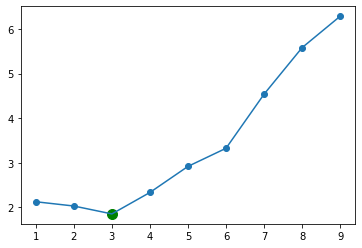

In [13]:
scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [14]:
model = DecisionTreeClassifier(max_depth=3)

In [15]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
Y_test_pred = model.predict(X_test)

In [17]:
model.score( X_test, Y_test )

0.46111111111111114

In [18]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.46111111111111114

Соседи

In [19]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [20]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [21]:
knn.score( X_test, Y_test )

0.9777777777777777

Задание 2:  
Взять датасет titanic (прошлое задание)  
Обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn  
Построить график сравнения roc-кривых моделей на тестовой выборки  
Вывести ROC AUC SCORE для каждой из моделей  

In [22]:
Xtrain = pd.read_pickle('titanic_prep/xtrain.pkl')
Xtest = pd.read_pickle('titanic_prep/xtest.pkl')
ytrain = pd.read_pickle('titanic_prep/ytrain.pkl')
ytest = pd.read_csv('titanic_prep/gender_submission.csv')['Survived']

In [23]:
Xtrain.shape

(889, 9)

In [24]:
Xtest.shape

(418, 9)

In [25]:
ytrain.shape

(889, 1)

In [26]:
ytest.shape

(418,)

Лог.Регрессия

In [46]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain, ytrain)
y_test_pred_log_reg = log_reg.predict(Xtest)

In [28]:
log_reg.score( Xtest, ytest )

0.9330143540669856

In [47]:
metrics.accuracy_score(ytest, y_test_pred_log_reg)

0.9330143540669856

In [59]:
metrics.roc_auc_score(ytest, y_test_pred_log_reg)

0.9346804511278196

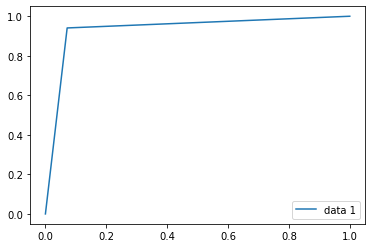

In [48]:
fpr, tpr, _ = metrics.roc_curve(ytest,  y_test_pred_log_reg)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

дерево

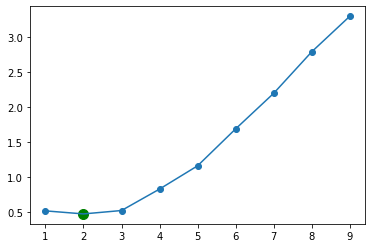

In [31]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

gridsearch.fit(Xtrain, ytrain)

scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [49]:
tree_class = DecisionTreeClassifier(max_depth=2)
tree_class.fit(Xtrain, ytrain)
Y_test_pred_tree_class = tree_class.predict(Xtest)
tree_class.score( Xtest, ytest )

0.8086124401913876

In [60]:
metrics.roc_auc_score(ytest, Y_test_pred_tree_class)

0.7481203007518796

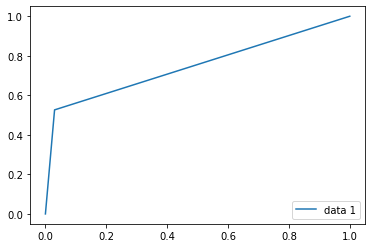

In [50]:
fpr, tpr, _ = metrics.roc_curve(ytest,  Y_test_pred_tree_class)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

Соседи

In [56]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(Xtrain, ytrain)
Y_test_pred_knn = knn.predict(Xtest)
knn.score( Xtest, ytest )

0.8325358851674641

In [61]:
metrics.roc_auc_score(ytest, Y_test_pred_knn)

0.8078007518796992

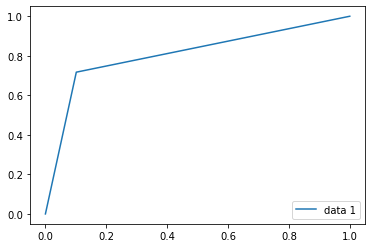

In [57]:
fpr, tpr, _ = metrics.roc_curve(ytest,  Y_test_pred_knn)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

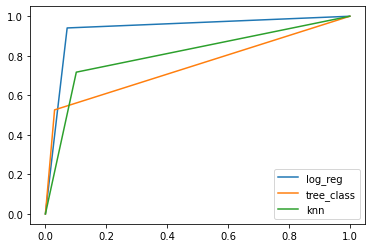

In [58]:
fpr, tpr, _ = metrics.roc_curve(ytest,  y_test_pred_log_reg)
fpr1, tpr1, _ = metrics.roc_curve(ytest,  Y_test_pred_tree_class)
fpr2, tpr2, _ = metrics.roc_curve(ytest,  Y_test_pred_knn)

plt.plot(fpr,tpr,label="log_reg")
plt.plot(fpr1,tpr1,label="tree_class")
plt.plot(fpr2,tpr2,label="knn")

plt.legend(loc=4)
plt.show()